## Report
#### By: Sarah Whitten, CS 344 at Calvin University

__Vision:__ My vision is to create a convolutional neural network that will accurately identify difference bird
species. This project is interesting to me because if I ever take a picture of one of these
birds and didn't know what was, I could run it through this program and find out. This would be very helpful for me
because I know very little about birds but I want to know. Earlier this semester I bought bird seed and like watching
birds come to eat it but I never know what species they are! Once my program is able to learn different bird species, I
will use a different dataset (of astronomical objects) to compare it.

__Background:__ In this project I am creating a CNN that takes in 27,503 training images, 1,000 testing images, and
1,000 validation images. Since I am using images from my own directory I will use keras' flow_from_directory() function
to create usable datasets. I tried to build a learner from the ground up using one of these
examples of convolutional neural networks laid out here:
https://www.analyticsvidhya.com/blog/2017/08/10-advanced-deep-learning-architectures-data-scientists/. The architecture
that I experimented with the most was the AlexNet architecture, however I never could get it to work bceause I kept
getting errors that I didn't know how to get to the root of. Because of this, I decided to go back to Chollet's example
code for making CNNs with small datasets: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb.

This was extremely frustrating because I stayed up all night trying to get different datasets to work but nothing was
successful. Email correspondence with Professor Vander Linden:
https://www.dropbox.com/s/k9k5a7aeugwotw4/EmailCorrespondence.pdf?dl=0

In [1]:
import keras
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/smw42/Documents/cs344/newproject/'

# The directory where we will
# store our smaller dataset
base_dir = '/home/smw42/Documents/project344/final_birds'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Using TensorFlow backend.


To make my architecture work with the full dataset of ~200 bird species (instead of just the two test species), I
needed to automate the input. If you look back at the __presentation.ipynb__ file, you'll see that there is a
separate block of code for each new folder creation for each bird species. This was not feasible to copy, paste, and
edit for every single one of the 200 species. It would've taken _far_ too long and I didn't have that kind of time
(and also it's just not very efficient and it's best to be as efficient as possible).

To do this, I created a list that contained all of the folder names (the names of the different bird species). This
allowed me to create a for loop to go through all of them. You may notice that there are two bird_names lists. The
first one is the full list and the second is the next sequence of testing that I used when I got such bad results from
using the whole list. In the longer list, there are some names that are lower case, contain underscores, and are
abbreviated and there are others that are fully capitalized, have spaces instead of underscores, and are not
abbreviated. This is because when I copied the files from a different location to this one, I thought (for some unknown
reason) that it would be a good idea to change the folder name. I realized after a little bit that that was taking
absolutely forever to do, so I just copied and pasted the rest of them in.
I also originally deleted files to make each folder contain a number of images that could be divided by 4 (in order to
get the segments equal for dividing into training, testing, and validation sets. But then I remembered that I could
convert the number into an integer after division and it didn't matter if the number of images was divisible by 4. In
order to make the code usable, I had to regulate the numbering of the images in each folder. The numbering was
surprisingly bad. There were often numbers missing or in the wrong format, so errors would pop up that I would have to
manually go in and fix. This took many hours but eventually I got everything to enter into my model successfully (and
I got to listen to my favorite podcast while doing it). Yay!

In [2]:
bird_names = ['am_bitt', 'alex_par', 'af_fire', 'alb', 'am_av',
              'am_coot', 'am_gold', 'am_kest', 'am_pip', 'am_red',
              'anhinga', 'an_hum', 'ant', 'ara_man', 'baldy',
              'balt_or', 'banana', 'barn_owl', 'barn_swal',
              'bartail', 'bb_warb', 'bc_chick', 'beard',
              'belt', 'b_grouse', 'bird_par', 'black_fran',
              'black_skim', 'black_swan', 'black_vul', 'BLUE HERON',
              'bn_grebe', 'BOBOLINK', 'BROWN NOODY', 'bt_spar',
              'bt_warb', 'CACTUS WREN', 'CALIFORNIA CONDOR',
              'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY',
              'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER',
              'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR',
              'CHIPPING SPARROW', 'CINNAMON TEAL', 'COCKATOO',
              'COCK OF THE ROCK', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN',
              'COMMON LOON', 'COMMON POORWILL', 'COMMON STARLING',
              'COUCHS KINGBIRD', 'CRESTED AUKLET', 'CRESTED CARACARA',
              'CROW', 'CROWNED PIGEON', 'CUBAN TODY', 'CURL CRESTED ARACURI',
              'DARK EYED JUNCO', 'D-ARNAUDS BARBET', 'DOWNY WOODPECKER',
              'EASTERN BLUEBIRD', 'EASTERN MEADOWLARK',
              'EASTERN ROSELLA', 'EASTERN TOWEE', 'ELEGANT TROGON',
              'ELLIOTS PHEASANT', 'EMPEROR PENGUIN', 'EMU',
              'EURASIAN MAGPIE', 'EVENING GROSBEAK',
              'FLAME TANAGER', 'FRIGATE', 'GILA WOODPECKER',
              'GILDED FLICKER', 'GLOSSY IBIS', 'GOLDEN CHEEKED WARBLER',
              'GOLDEN CHLOROPHONIA', 'GOLDEN PHEASANT', 'GOLD WING WARBLER',
              'GOULDIAN FINCH', 'GRAY PARTRIDGE', 'GREEN JAY',
              'GREY PLOVER', 'GUINEAFOWL', 'HAWAIIAN GOOSE',
              'HOODED MERGANSER', 'HOOPOES', 'HOUSE FINCH', 'HOUSE SPARROW',
              'HYACINTH MACAW', 'IMPERIAL SHAQ', 'INCA TERN',
              'INDIGO BUNTING', 'JABIRU', 'JAVAN MAGPIE',
              'KILLDEAR', 'KING VULTURE', 'LARK BUNTING', 'LILAC ROLLER',
              'LONG-EARED OWL', 'MALACHITE KINGFISHER', 'MALEO',
              'MALLARD DUCK', 'MANDARIN DUCK', 'MARABOU STORK',
              'MASKED BOOBY', 'MIKADO PHEASANT', 'MOURNING DOVE',
              'MYNA', 'NICOBAR PIGEON', 'NORTHERN CARDINAL',
              'NORTHERN FLICKER', 'NORTHERN GANNET', 'NORTHERN GOSHAWK',
              'NORTHERN JACANA', 'NORTHERN MOCKINGBIRD',
              'NORTHERN PARULA', 'NORTHERN RED BISHOP',
              'OCELLATED TURKEY', 'OSPREY', 'PAINTED BUNTIG',
              'PARUS MAJOR', 'PEACOCK', 'PEREGRINE FALCON',
              'PINK ROBIN', 'PUFFIN', 'PURPLE FINCH',
              'PURPLE GALLINULE', 'PURPLE MARTIN', 'PURPLE SWAMPHEN',
              'QUETZAL', 'RAINBOW LORIKEET', 'RAZORBILL',
              'RED FACED CORMORANT', 'RED FACED WARBLER',
              'RED HEADED DUCK', 'RED HEADED WOODPECKER', 'RED HONEY CREEPER',
              'RED THROATED BEE EATER',
              'RING-BILLED GULL', 'ROADRUNNER',
              'ROCK DOVE', 'ROSY FACED LOVEBIRD', 'RUBY THROATED HUMMINGBIRD',
              'RUFUOS MOTMOT', 'SCARLET MACAW', 'SHOEBILL',
              'SNOWY OWL', 'SORA', 'SPANGLED COTINGA', 'SPLENDID WREN',
              'SPOONBILL', 'STEAMER DUCK', 'STORK BILLED KINGFISHER',
              'STRAWBERRY FINCH', 'TAIWAN MAGPIE', 'TEAL DUCK',
              'TIT MOUSE', 'TOUCHAN', 'TOWNSENDS WARBLER', 'TREE SWALLOW',
              'TRUMPTER SWAN', 'TURKEY VULTURE', 'TURQUOISE MOTMOT',
              'VARIED THRUSH', 'VENEZUELIAN TROUPIAL',
              'VERMILION FLYCATHER', 'VIOLET GREEN SWALLOW',
              'WATTLED CURASSOW', 'WHITE CHEEKED TURACO', 'WHITE NECKED RAVEN',
              'WHITE TAILED TROPIC', 'WILD TURKEY',
              'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW HEADED BLACKBIRD']
bird_names = ['am_bitt', 'alex_par', 'am_pip']

for bird_name in bird_names:

    train_bird_dir = os.path.join(train_dir, bird_name)
    os.mkdir(train_bird_dir)
    test_bird_dir = os.path.join(test_dir, bird_name)
    os.mkdir(test_bird_dir)
    validation_bird_dir = os.path.join(validation_dir, bird_name)
    os.mkdir(validation_bird_dir)

    folder_files = len(os.listdir(original_dataset_dir+bird_name+'/'))
    half_folder = int(folder_files/2)
    quarter_folder = int(folder_files/4)
    # print(bird_name, folder_files)

    file_names = ['{0:0=3d}.jpg'.format(i) for i in range(half_folder)]
    for file_name in file_names:
        src = os.path.join(original_dataset_dir+bird_name+'/', file_name)
        train_dst = os.path.join(train_bird_dir, file_name)
        shutil.copyfile(src, train_dst)

    file_names = ['{0:0=3d}.jpg'.format(i) for i in range(half_folder, half_folder+quarter_folder)]
    for file_name in file_names:
        src = os.path.join(original_dataset_dir+bird_name+'/', file_name)
        dst = os.path.join(validation_bird_dir, file_name)
        shutil.copyfile(src, dst)

    file_names = ['{0:0=3d}.jpg'.format(i) for i in range(half_folder+quarter_folder, folder_files)]
    for file_name in file_names:
        src = os.path.join(original_dataset_dir+bird_name+'/', file_name)
        dst = os.path.join(test_bird_dir, file_name)
        shutil.copyfile(src, dst)

print("Process Complete!")

Process Complete!


In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
# originally sigmoid

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               42467840  
______________________________________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0000001),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary'
        )
# class_mode='binary'

Found 268 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
50/50 [==============================] - 44s 875ms/step - loss: -0.5035 - acc: 0.3280 - val_loss: -1.8299 - val_acc: 0.3298

As I mentioned above, I used a list of only three bird categories instead of going straight from two categories to the
full ~200. I did this because, despite the high accuracy results we got with our sample run that just used two species
of birds, the addition of all ~200 categories resulted in validation accuracies hovering around 1%. That's
___unbelievably terrible___ accuracy. It makes sense that the accuracy would decrease with added categories, but it
shouldn't have decreased _that_ drastically. The losses were also _extremely_ large (reaching as large as -8,700,000,000,000).
In order to figure out what was going on, I took a smaller step to see at which point things went South. It turns out
that things went South as soon as a third category was added. The validation accuracy of my program tanked when the
third category was added. It went from ~98% with two categories to ~33% with three. This resulted in an accuracy drop
from ~97.7% with two categories to ~33% with three categories. I tried to figure out what was going wrong by fiddling
with the hyper-parameters such as learning rate, batch size, number of epochs, and more. Nothing made much of a
difference and everything resulted in a validation accuracy that hovered around the 32-33% mark.

I also tried slightly adjusting the architecture that was given to me by Chollet, which can be found by following this
link: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
or by heading over to the __presentation.ipynb__ file where it is written in its original form. Despite my changes,
still nothing made a difference in the accuracy. However, by changing the final activation function from "sigmoid" to
"softmax" I was able to get the loss to a reasonable number (it still didn't change the validation accuracy, though, so
it's not very important). The graphs below show how little improvement was made with the testing and validation
accuracies.

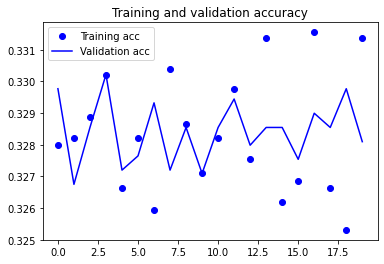

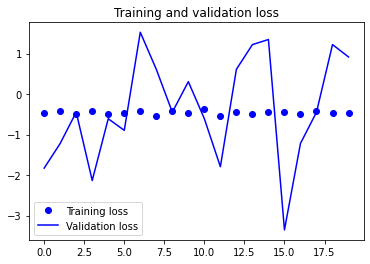

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

If I had gotten the program to successfully learn the different bird species, I would have loved to be able to test my
architecture with another dataset. Even if I had gotten it to successfully learn just three or four categories I
would've been happy because I previously made a catalog of astronomical objects that I would have loved to have trained
my program on. I study astronomy, so it would've been really cool to build a program that could differentiate different
astronomical objects from pictures. The dataset can be found here: https://www.dropbox.com/sh/vc64paz18t7egrd/AACxn9QiZpNMJsk7__XLfPZ0a?dl=0.
I made four categories: nebulae, spiral galaxies, planets, and globular clusters. I could have separated "planets" into
"ringed planets" and "non-ringed planets," but I decided to lump them altogether as one. One drawback from my dataset,
as it currently is, is that the images I have downloaded are all different sizes, resolutions, and orientations and
also don't have a consistent naming pattern (since they were downloaded from a plethera of different sources. If I can
get my program to successfully learn more than two categories, I will work on cleaning my astronomy dataset so that it
can be (relatively) painlessly read into the program and learned. This would be helpful for the Calvin University
Department of Physics and Astronomy because they have a very large database of images that could be sorted into
categories by this program. Calvin already has a large database of imagery, but it is all scattered throughout various
hard drives as well as numerous DVDs from over the years. This program could allow all those images to be put in one
and could potentially be put online so that the public could access it, which I think would be a cool application.
Another interesting aspect would be allowing internet-people to enter their image and find out what it was (and maybe
even identify the name of the specific object, if the program was developed enough. This would kind of be similar to a
reverse image search and would take a _lot_ more development